## View colored parametric map previously generated from QuantUS workflow

This colored parametric map uses a pre-defined colormap to visualize the numerical values of a parametric map.

In the section after this, we will view the numerical values behind the colored parametric map, which can
also be used to make a new visualization with a different colormap.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
colored_paramap_path = '/home/das/QuantUS_Projs/QuantUS-Plugins-CEUS/paramaps_LOGNORMAL/AUC_TIC_colored.npy'
im_path = '/home/das/QuantUS_Projs/QuantUS-Plugins-CEUS/paramaps_LOGNORMAL/image.npy'
seg_path = '/home/das/QuantUS_Projs/QuantUS-Plugins-CEUS/paramaps_LOGNORMAL/segmentation.npy'

In [3]:
colored_paramap = np.load(colored_paramap_path)
im = np.load(im_path)
seg = np.load(seg_path)

In [4]:
colored_paramap.shape, im.shape, seg.shape

((208, 172, 89, 4), (208, 172, 89, 281), (208, 172, 89))

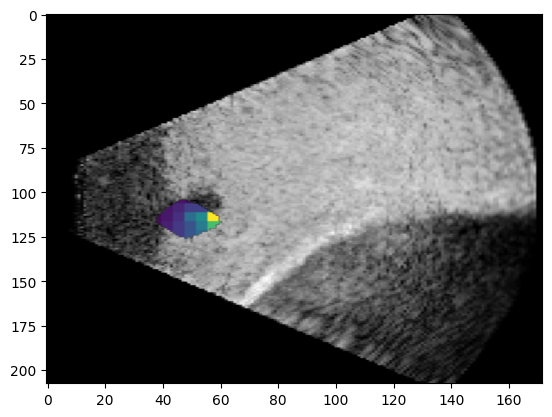

In [5]:
import matplotlib.pyplot as plt

ax_frame = 32
frame = 100

plt.imshow(im[:, :, ax_frame, frame], cmap='gray', aspect='auto')
plt.imshow(colored_paramap[:, :, ax_frame], aspect='auto')

## View numerical values behind the colored parametric map

In [6]:
numerical_paramap_path = '/home/das/QuantUS_Projs/QuantUS-Plugins-CEUS/paramaps_LOGNORMAL/PE_TIC_numerical.npy'

In [7]:
numerical_paramap = np.load(numerical_paramap_path)

In [8]:
numerical_paramap.shape, colored_paramap.shape

((208, 172, 89), (208, 172, 89, 4))

In [9]:
np.nanmax(numerical_paramap), np.nanmin(numerical_paramap)

(np.float32(0.9895876), np.float32(0.4094079))

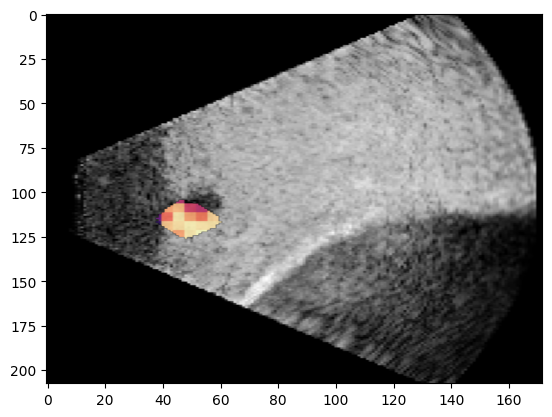

In [10]:
plt.imshow(im[:, :, ax_frame, frame], cmap='gray', aspect='auto')
plt.imshow(numerical_paramap[:, :, ax_frame], cmap='magma', alpha=0.9, aspect='auto')

## 3D visualization of parametric map

In [11]:
pixdims = np.load('../paramaps_LOGNORMAL/pix_dims.npy')

In [ ]:
affine = np.eye(4)
for i, dim in enumerate(reversed(pixdims)):
    affine[i, i] = dim

In [ ]:
import napari

viewer = napari.Viewer()
viewer.add_image(im.T, name='Image', colormap='gray', blending='additive', affine=affine)
viewer.add_image(numerical_paramap.T, name='Parametric Map', colormap='turbo', blending='additive', opacity=0.7, affine=affine)

<Image layer 'Parametric Map' at 0x7fe8006eb310>